<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_project1_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **관객 수가 많은 감독의 이전 작품의 관객 수 분석**

##### 필요한 모듈 임포트 및 데이터 리딩

In [ ]:
# matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/ESAA YB/dataset/movies_train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### 데이터 내 변수 확인

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
print('train:', train.shape)

train: (600, 12)


train data에는 12개의 column이 존재하며 600개의 데이터가 존재함

##### 데이터 요약 통계량 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


train과 test 모두 release_time 변수가 object 타입 객체로 지정되어있음.

이를 datetime 객체로 변환하는 과정이 필요함

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


##### 결측치 확인 및 데이터 전처리

In [ ]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


dir_prev_bfnum 변수에 결측값이 존재

In [ ]:
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


dir_prev_bfnum이 결측값으로 존재하는 데이터들은 모두 dir_prev_num이 0인 영화임.

따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채움.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
print(train['dir_prev_bfnum'].isna().sum())

0


- 결측치 처리 결과값 확인

In [ ]:
print(train['release_time'].dtype)

object


release_time 변수는 시간에 관한 데이터인데 datetime 객체로 인식되고 있지 않음.

따라서 release_time을 datetime 타입으로 변환

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

In [ ]:
print(train['release_time'].dtype)

datetime64[ns]


- datetime 객체로 변환된 것을 확인

In [ ]:
train[train['distributor']=='시네마 달'].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,0.0,0,6,0,652
108,레드마리아,시네마 달,다큐멘터리,2012-04-26,98,15세 관람가,경순,10393.5,2,4,10,2119
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,0.0,0,11,0,10942
212,땅의 여자,시네마 달,다큐멘터리,2010-09-09,95,전체 관람가,권우정,0.0,0,7,3,2418
216,나비와 바다,시네마 달,다큐멘터리,2013-01-24,89,12세 관람가,박배일,0.0,0,6,2,1240


In [ ]:
train[train['distributor']=='시네마달'].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
204,다이빙벨: 진실은 침몰하지 않습니다,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308
274,탐욕의 제국,시네마달,다큐멘터리,2014-03-06,92,12세 관람가,홍리경,0.0,0,7,3,5808
342,그리고 싶은 것,시네마달,다큐멘터리,2013-08-15,92,전체 관람가,권효,891.0,1,24,4,5014
363,꿈의 공장,시네마달,다큐멘터리,2011-09-01,87,12세 관람가,김성균,0.0,0,6,8,888
407,다이빙벨,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308


distributor(배급사) 변수에서 '시네마 달'과 '시네마달'은 같은 배급사인데 띄어쓰기 때문에 다른 값으로 인식되고있음.

따라서 이를 '시네마달'로 통일해줌

In [ ]:
train['distributor'][train['distributor']=='시네마 달']='시네마달'

In [ ]:
train[train['distributor']=='시네마 달'].count()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,0
dir_prev_num,0
num_staff,0


- '시네마 달' 값을 가지는 데이터가 사라진 것을 확인

##### **데이터 시각화 및 분석**

**< 목표 > 관객 수가 많은 감독의 이전 작품 수와 관객 수를 분석**

관객 수가 많은 감독을 알아내기 위해 관객 수 상위 10개의 데이터를 추출 후 총 관객 수가 많은 감독 상위 10명을 시각화

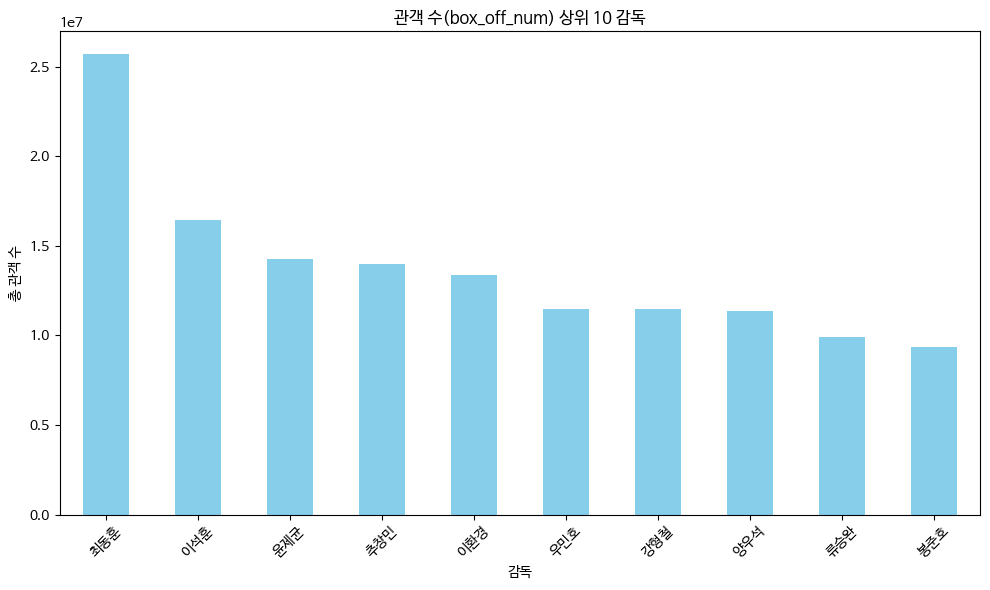

In [ ]:
# 각 감독별 총 관객 수(box_off_num) 계산
director_box_off = train.groupby('director')['box_off_num'].sum().sort_values(ascending=False)

# 관객 수(box_off_num)가 많은 상위 10명의 감독 추출
top10_directors = director_box_off.head(10)

# 시각화
plt.figure(figsize=(10, 6))
top10_directors.plot(kind='bar', color='skyblue')
plt.title('관객 수(box_off_num) 상위 10 감독')
plt.xlabel('감독')
plt.ylabel('총 관객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

관객 수 상위 10개 영화의 감독 데이터를 추출하여 시각화한 결과이다.

'최동훈' 감독이 총 관객 수 상위 감독 10명 내에서도 상대적으로 더 많은 관객 수를 보이고 있다.

다음 그래프에서 상위 3개의 영화 감독인 '최동훈', '이석훈', '윤제균' 감독을 위주로 추가 분석 시도

---

위의 영화감독 10명의 이전 작품 수와 이전 작품의 평균 관객 수를 알아보겠다.

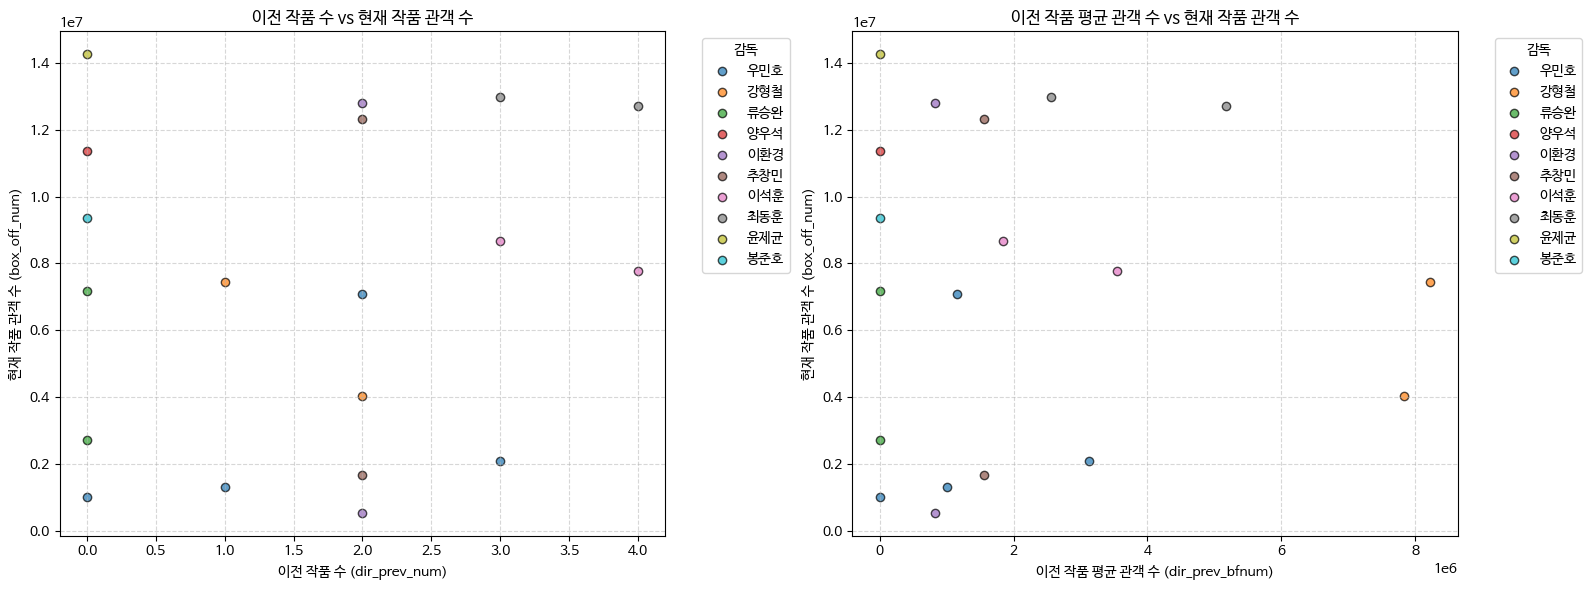

In [ ]:
# 각 감독별 총 관객 수(box_off_num) 계산
director_box_off = train.groupby('director')['box_off_num'].sum().sort_values(ascending=False)

# 관객 수가 많은 상위 10 감독 추출
top10_directors = director_box_off.head(10).index.tolist()

# 상위 10 감독의 데이터만 선택
train_top10 = train[train['director'].isin(top10_directors)]

# 색상을 감독별로 다르게 설정
directors = train_top10['director'].unique()
palette = sns.color_palette('tab10', len(directors))  # 10개의 고유 색상 생성
color_map = dict(zip(directors, palette))  # 감독 이름을 색상과 매핑

# 서브플롯 생성 (1행 2열)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. 이전 작품 수 vs 현재 작품 관객 수 산점도
for director in directors:
    df_subset = train_top10[train_top10['director'] == director]
    ax[0].scatter(df_subset['dir_prev_num'], df_subset['box_off_num'],
                  color=color_map[director], label=director, alpha=0.7, edgecolors='black')

ax[0].set_title('이전 작품 수 vs 현재 작품 관객 수')
ax[0].set_xlabel('이전 작품 수 (dir_prev_num)')
ax[0].set_ylabel('현재 작품 관객 수 (box_off_num)')
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].legend(title="감독", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

# 2. 이전 작품 평균 관객 수 vs 현재 작품 관객 수 산점도
for director in directors:
    df_subset = train_top10[train_top10['director'] == director]
    ax[1].scatter(df_subset['dir_prev_bfnum'], df_subset['box_off_num'],
                  color=color_map[director], label=director, alpha=0.7, edgecolors='black')

ax[1].set_title('이전 작품 평균 관객 수 vs 현재 작품 관객 수')
ax[1].set_xlabel('이전 작품 평균 관객 수 (dir_prev_bfnum)')
ax[1].set_ylabel('현재 작품 관객 수 (box_off_num)')
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].legend(title="감독", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

plt.tight_layout()
plt.show()

**1. 이전 작품 수(dir_prev_num) vs 현재 작품 관객 수 (box_off_num)**


위 그래프는 특정 감독이 만든 영화가 각각 point로 표시된 scatter plot이다.

앞의 그래프에서 확인한 가장 많은 총 관객 수를 가지던 '최동훈' 감독의 데이터 point를 확인해보면, 상대적으로 많은 이전 작품 수를 가지고 있으며 또한 현재 작품의 관객 수도 많은 편임을 확인할 수 있다.

두 번째로 많은 총 관객 수를 가지던 '이석훈' 감독의 데이터 point를 확인해보면, 상대적으로 많은 이전 작품 수를 가지고 있지만 현재 작품의 관객 수가 많다고는 볼 수 없다.

세 번째로 많은 총 관객 수를 가지던 '윤제균' 감독의 데이터 point를 확인해보면, 이전 작품의 수가 0개인데도 위 그래프에서 가장 높은 현재 관객 수를 보인다.

가장 많은 총 관객 수를 가지는 '최동훈' 감독의 데이터 포인트를 통해서 이전 작품 수가 많다해서 현재 작품 수의 관객 수가 많다고 볼 수 있음을 예측해볼 수 있다.

하지만 다른 감독의 데이터를 통해 알아본 결과, 양의 상관관계가 크게 존재하지 않음을 알 수 있다.

결론적으로 이전 작품 수가 많다고 반드시 다음 영화가 흥행하는 것이 아님을 확인할 수 있다.

**2. 이전 작품 평균 관객 수(dir_prev_bfnum) vs 현재 작품의 관객 수(box_off_num)**

'강형철' 감독의 데이터 포인트를 확인해보면, 상대적으로 이전 작품의 평균 관객 수가 많은 편이다. 하지만 현재 작품의 관객 수가 많다고는 볼 수 없다.

'우민호' 감독의 데이터 포인트를 보면 이전 작품의 평균 관객 수와 현재 작품의 관객 수가 양의 상관관계를 가지고 있다고 볼 수 있다.

1번 그래프에서 확인했듯이, '최동훈' 감독은 이전 작품 평균 관객 수가 상대적으로 많고, 현재 작품의 관객 수도 많다고 볼 수 있으며 '윤제균' 감독은 이전 작품의 수가 0개였으므로 이전 작품의 평균 관객 수도 0이지만, 높은 현재 작품의 관객 수를 가지고 있음을 알 수 있다.

하지만 몇몇 감독은 약한 양의 상관관계를 보이고 있는 것 같지만, 이전 작품의 평균 관객 수가 많다고 해서 현재 작품의 관객 수가 많을 것이라고 볼 수 없다.

결론적으로 이전 작품의 평균 관객 수가 많다고 해서 다음 작품들이 흥행한다는 것을 보장할 수 없다.

**결론: 영화의 관객 수는 감독의 이전 작품의 흥행과는 관련이 거의 없다고 볼 수 있다.**